<h1>
<font color="#ff2e2e">
CamScanner
</font>
</h1>

In [101]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

<h3><font color = "#079e05"> Utilities </font></h3>

In [102]:
def imshow(im):
    width, height, *channels = im.shape
    if channels:
        # By default, OpenCV tends to work with images in the BGR format.
        # This is due to some outdated practices, but it has been left in the library.
        # We can iterate the channels in reverse order to get an RGB image.
        plt.imshow(im[:,:,::-1])
    else:
        plt.imshow(im, cmap='gray')
    plt.axis('off')

In [103]:
def reorder(vertices):
    # OpenCV *prefers* if we use `np.float32`.
    reordered = np.zeros_like(vertices, dtype=np.float32)
    add = vertices.sum(1)
    reordered[0] = vertices[np.argmin(add)]
    reordered[2] = vertices[np.argmax(add)]
    diff = np.diff(vertices, axis=1)
    reordered[1] = vertices[np.argmin(diff)]
    reordered[3] = vertices[np.argmax(diff)]
    return reordered

<h3><font color = "#079e05"> Image </font></h3>

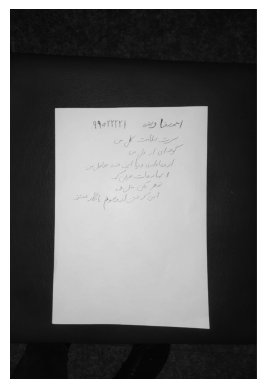

In [104]:
im = cv2.imread("./images/1.jpg",cv2.IMREAD_GRAYSCALE)
imshow(im)

<h3><font color = "#079e05"> Process </font></h3>

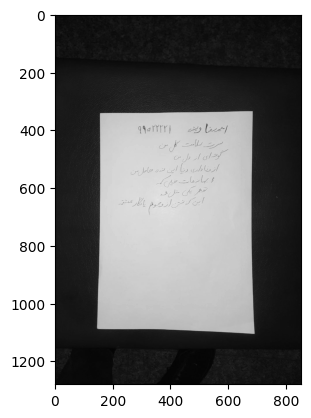

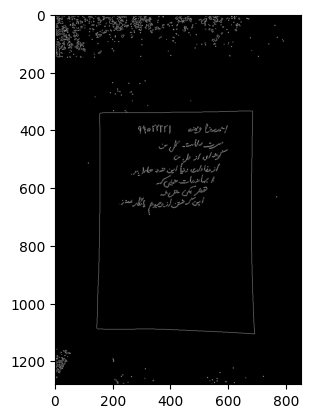

In [116]:
edited= cv2.GaussianBlur(im,(1,1),3)
plt.imshow(edited, cmap='gray')
plt.show()

th3 = cv2.adaptiveThreshold(edited ,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,1001,0)
# plt.imshow(th3, cmap='gray')
# plt.show()

edgeimage= cv2.Canny(th3,30,50)
plt.imshow(edgeimage,cmap="gray")
plt.show()
# imshow(edgeimage)
contours,_=cv2.findContours(edgeimage,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

max_con = contours[0]
max_con_A = len(max_con)
for cnt in contours:
    if len(cnt) > max_con_A:
        max_con_A = len(cnt)
        max_con = cnt

# print(max_con)
res = im.copy()
# cv2.drawContours(res, max_con, -1, (233, 30, 0), 5)
# corner = 0
# p=0

# for cnt in contours:
epsilon = 0.01 * cv2.arcLength(
                            max_con, True)
approx = cv2.approxPolyDP(max_con, epsilon, True)

pts1 = np.float32([approx[0], approx[1], approx[2], approx[3]])
# print(approx[0],approx[1],approx[2],approx[3])
# print("---------")
width, height = 2400, 3500
pts2 = np.float32([[width, 0], [0, 0], [0, height], [width, height]])
M = cv2.getPerspectiveTransform(pts1, pts2)
output_img = cv2.warpPerspective(res, M, (width, height))
# #     x,y,w,h=cv2.boundingRect(approx)
# #     if w+h>p:
# #         p=w+h
# #         corner=approx
# for point in approx:
#     print(point)
#     cv2.circle(res, tuple(point[0]), 5, (255, 255, 255), -1)
# x,y,w,h=cv2.boundingRect(approx)
# cv2.drawContours(res, [approx], 0, (80, 255, 0), 5)
# plt.imshow(res,cmap="gray")
# cv2.imshow('Transformed Image', output_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# plt.show()

<h3><font color = "#079e05"> Show the result </font></h3>

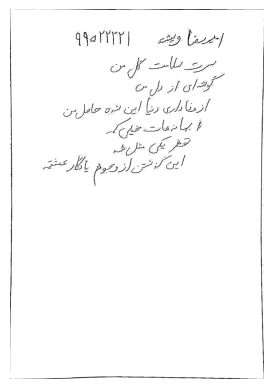

In [117]:
out=output_img.copy()
out = cv2.adaptiveThreshold(out ,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,21,6)
imshow(out)